Project name: Book recommender system

Problem:

<u>Objective</u>:
This project aims to recommendate books to users based on a hybrid of content-based and collaborative-based recommendation system. The problem is given a dataset of users, books and users' ratings, how to recommend most relevant books to our users such that accuracy and relevancy of the recommended books are maximized.

<u>Platform used</u>:
The system is based on a mobile platform where users can interact with the systems and recommendations are provided upon user login. With the large database of books and users, it makes logistic sense to run the core of the recommendation engine on our own server and the mobile app is only a platform where recommendations are served. The server will handle all recommendations computation such as cosine-similarity match (for content-filtering) and matrix factorization (for collaborative-filtering).

### Competitor Analysis

**Goodreads:** The largest market share holder by far is Goodreads which has [140 million members (2022)](https://www.goodreads.com/blog/show/2302-goodreads-members-top-72-hit-books-of-the-year-so-far) and [3.5 billion book](https://help.goodreads.com/s/question/0D58V00008Rm69PSAR/how-many-books-are-listed-on-the-goodreads-site). However, a common critism seems to be that the site is very much under-developed and the recommendation algorithm is very "primitive". The claim of the latter is caused by the increasingly irrelevant books that are recommended. To verify this, one of the group member did an emperical obversation by registering an account and set up the recommendation to suit his perferance. His perference is based on history and particulary the WW2 era. Upon seeing the recommended books, most of them seem related to WW2 history but a not insignicant number of the recommendations are completely irrelevant to his perference (e.g. a Spiderman comic, a teenage novel etc). From furthure observation, these "irrelevant" books are recommended because the user rated some other books that are related to history (Both of these are recommended because the user liked a comic about the concentration camp). The algortihm used seems to be a naive similiartiy matching between the books the user liked and all other books in the dataset.

**The StoryGraph:**
As a major alternative to Goodreads, The StoryGraph offers a much more personalised recommendation to users by analysing users' reading habits, and break down the online library by mood, pace, length, genre, rating, etc. The site is under heavy development with many short, medium and long-term road map of experimental features. (E.g. a beta feature like tropes or triggers that users want to avoid in recommended books). The feedback on this site is generally positive for it's tailored recommendations. A major limitation of the site is that there are only a few thousands books available and the social/community aspect is not as strong as Goodreads social community.

### Our recommendation system:
**User input:** Currently, the only source of input for our users would be the N number of book rating (1-10) that new users will be asked upon first registering an account. The ratings are vital for our recommendation system to provide relevant recommendation tailered to the user (detail explanation in the method section). The form of the recommendation is as follow: a top N number of books would be recommended to the user and shown on screen. These are sorted based on the relevancy of these books to the user as determined by our recommendation system. These recommendations are shown to the user upon entering our platform. Recommendation for each user will be recalculated periodically based on user's new book ratings. Again, the only form of feedback from users are the book ratings but more forms of feedback can be considered in the future. This includes: dislike buttons, some specific trigers that users want to avoid, book reviews, feedback for our platform etc. For ideas as to how to implement these, if a user dislikes a book or some type of books, the system should account for this by deleting some of the books in the recommended list or adjust the recommendation model such that these types of books will be heavily penalised inside our model (i.e. a negative score in the matrix factorization model).

Since this is a hybrid ensemble model, we will walk through the gist of the model. There are 2 recommendation models and each have deals with a seperate problem.
**Content-based:**
Firstly, for content-based filtering, the problem is a ranking problem because we will build a user preference vector based on all the books they rated, and this profile is compared against all other books in the datase using tf-idf. All books are then sorted based on their similarity to the user preference vector and top N most similar books will be picked. This is a ranking problem.

**Collaborative-based:**
Secondly, for Collaborative-based filtering, the problem is both a rating/estimation problem and ranking problem. The goal of this model is to predict the most likely ratings of each user on books they haven't rated. Annd it is also a rannking problem because after getting the predicted book ratings, the predicted ratings need to be sorted for each user and pick the top N books to recommend.

**User interface:**

N number of recommended books are displayed at a time. Users can click on the book they are interested in to see more details about the book or click on the play button to start reading directly.

<img src="UX1.png">

Here, the user can see more information about the book. Particularly, the book’s ISBN, year of publication, synopsis and publisher of the book. There is also a book’s rating aggregated from users who read the book. Users can start reading the book by clicking the play button. Users are also allowed to give ratings after reading the book.

<img src="UX2.png">



### Dataset
**Basic characteristics:**
The dataset we used is mainly from [Kaggle](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset/data?select=Ratings.csv) The data was collected by Cai-Nicolas Ziegler through a 4-week crawl on www.bookcrossing.com.

A brief overview of the dataset:
There are 3 CSV files,
-	Users.csv: 278,858 rows of users and the 3 columns are User-ID, location and age
-	Books.csv: 271,379 rows of books and the 7 columns are Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M and Image-URL-L.
-	Ratings.csv: 1,149,780 rows of book ratings where the 3 columns are User-ID, ISBN, and ratings

Additional, to supplement content-filtering model, we used various webcrawing technique and API to extract book description and category/genre information from Google books and Openlibrary. We then combined the above information in Books.csv such that each book has 4 additional columns named Desription, Category, Openlibrary_Desription and Openlibrary_category.

**Exploratory data analysis on the dataset:**


**Weaknesses:**
**User ratings distribution:**
<img src="user distribution.png">
From the distribution, we can see that the vast majority of the users have very few ratings. This is an extremely right-skewed distribution with a small minority of the users having most of the ratings (notice the log-scale). The implication is that the recommendations provided may be biased in favour of these more "vocal" users. Further, observe the following statistics:

Total number of users: 278858
Total number of books: 83580 (as tallied in books.csv)
Number of users with ratings: 105283
Number of books with ratings: 340556
Number of users without ratings: 173575 (total_users in users.csv - rated_users in ratings.csv)
Number of books without ratings: -256976 (total_books in books.csv - rated_books in ratings.csv)

Observations:
- There are 173575 users who never rated any books (62% of all users!).
- Notice the negative number of books without ratings. This is because there are more books in ratings.csv than the books in books.csv. This is a mistake caused by the original owner who gathered the data. The implication is that there are occasions where we could not retrieve full details of the recommended book because it doesn't exist in books.csv where information such as book title, authour and book description are located. We discovered the problem too late so we had to find other recommended books to fill the top-N recommended book list (Sacrificing relevancy since the list is sorted based on relevancy). 

Another weakness of the dataset which we overcame is the fact that the original dataset doesn't have book description which content-based model depends on. However, we solved this problem by webscraping book description from online websites.

**Strength:**
First of all, the dataset is very suited for collaborative-filtering model as we have abundance of data on user ratings. We can feed this data directly into our model without much modifications. One worthy mention of the dataset is the extra context about the users such as their geograpical location and age. This could be useful for context-aware recommendation. Another strength is the sheer size of the dataset. However, due to the limitation of our computation resources, we could not utilize the full dataset, unfortunately.


**Subset of the dataset:**
We decided to use a subset of the data because the original dataset is simply too big for our computers to handle. For example, during matrix factorization, we had to use compressed sparse row (CSR) to represent our matrix because the user-item matrix is simply too big to store in the memory. The runtime of the matrix factorization algortihm also takes too long for the original dataset. There is also a major practical constraint of webscraping for book description. Because we need to retrieve the description for each book through API or webscraping. To obtain description for all 271,379 books is a very time consuming task as only about 40,000 of books can be scraped in 24 hours. We need to scrape 271,379 * 2 number of descriptions for both Google books and Openlibrary. So we needed abount 14 days to obtain the entire set of descriptions which is not permitted by time. In the end, we decided to use about 30% of the original book dataset.


## Methods:

**Collaborative-filtering models:**
For the Collaborative-filtering models, we have 2 implementations differing only in the method of matrix factorization. 

**Stochastic gradient descend (SGD) approach:**
Objective: Decompose user-book ratings matrix R into 2 lower-dimensional matrices:
- P_mxk (user-latent factor matrix)
- Q_nxk (item-latent factor matrix)

The goal is to minimize the difference between the actual ratings and the predicted ratings (from dot product of P and Q^T)

<img src="Gradient2.jpg">
<img src="Gradient1.jpg">



In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# Load the original datasets
""" books = pd.read_csv('combined_books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv') """

books = pd.read_csv('sample_books.csv')
users = pd.read_csv('sample_users.csv')
ratings = pd.read_csv('sample_ratings.csv')


# Create mappings from books.csv and users.csv
user_id_mapping = {id: idx for idx, id in enumerate(ratings['User-ID'].unique())}
book_id_mapping = {id: idx for idx, id in enumerate(ratings['ISBN'].unique())}


ratings['User-ID'] = ratings['User-ID'].map(user_id_mapping)
ratings['ISBN'] = ratings['ISBN'].map(book_id_mapping)

# Create user-item rating matrix
n_users = len(user_id_mapping)
n_items = len(book_id_mapping)

row = ratings['User-ID'].values
col = ratings['ISBN'].values
data = ratings['Book-Rating'].values
R = csr_matrix((data, (row, col)), shape=(n_users, n_items))

# user-item matrix
print(R.toarray())

# Function to implement NMF using gradient descent
def nmf(R, k, alpha=0.01, lambda_=0.1, n_iterations=2000):
    n_users, n_items = R.shape
    P = np.random.rand(n_users, k)
    Q = np.random.rand(n_items, k).T

    for iteration in range(n_iterations):
        #print(iteration)
        for u in range(n_users):
            for i in range(n_items):
                if R[u, i] > 0:
                    error = R[u, i] - np.dot(P[u, :], Q[:, i])
                    #P[u, :] -= alpha * (2 * error * Q[:, i] +  2 * lambda_ * P[u, :])
                    #Q[:, i] -= alpha * (2 * error * P[u, :] +  2 * lambda_ * Q[:, i])

                    P[u, :] += alpha * (2 * error * Q[:, i] - 2 * lambda_ * P[u, :])
                    Q[:, i] += alpha * (2 * error * P[u, :] - 2 * lambda_ * Q[:, i])

    return P, Q.T

k_values = 2


P, Q = nmf(R, k_values, alpha=0.01, lambda_=0.1, n_iterations=1000)

R_pred = np.dot(P, Q.T)
R_pred



[[3 1 1 0 0]
 [1 4 0 1 0]
 [3 0 1 3 1]
 [0 0 4 4 3]]


array([[2.75087014, 0.95374078, 1.08923653, 2.68453109, 1.03759988],
       [0.95637107, 3.76470734, 2.64725105, 1.0755577 , 1.82070844],
       [2.86439314, 0.88256132, 1.06114484, 2.7907363 , 1.03341191],
       [3.81470755, 4.74415361, 3.77140554, 3.8644848 , 2.89393022]])

<img src="Pattern.jpg">

### Reflection
The implementation of matrix factorization used in collaborative filtering 

In our honest opinion, the current recommendation as it is, is not commercially viable and more work needs to be done to improve the relevancy of the recommendations. The most obvious areas of improvement is the improvement of the  

**Furthure improvement:**
context-aware recommendation: To furthure improve the relevancy of the collaborative filtering model, a potential area of improvement is the usage of the generalised factorization machine introduced in the context-aware recommendation lecture. We could consider adding additional dimensions to the matrix factorization problem with context variables such as time/days, location and age. By capturing the hidden relationship between users, books and context variables, we believe we could significantly improve the relevancy of the recommendations. In fact, the current dataset does contain context information such as users' location and age. However, due to time constraint, we could not experiment furthure with this idea. From our experience with the traditional matrix factorization problem, we realised the great difficulty of decomposing a matrix as sparse as the user-item matrix, where the matrix is enourmously large (so large that we could not fit the entire matrix in RAM without converting it to CSR) yet the vast majority of the entries are empty. We could only imagine the greater difficulty of adding more dimensions to the problem and thus have an even larger sparse matrix (more accurately, tensors). This problem may be beyond our current capability to solve. 


## Content-base

In [2]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')
books_df = pd.read_csv("combined_books.csv")
ratings_df = pd.read_csv("content_Ratings.csv")
users_df = pd.read_csv("content_Users.csv")

In [3]:
new_user_data = {'User-ID': 279858, 'Location': "kensington, nsw, australia", 'Age': 38}

# Append the new user to the DataFrame
users_df = pd.concat([users_df, pd.DataFrame([new_user_data])], ignore_index=True)

# List of ISBNs to be rated by the new user
isbn_list = [
    '0425176428', '0385418493', '0871137380', '0486265862', '0060973129',
    '0029087104', '0553256696', '0393038440', '0345308239', '0131337033', 
]

# Generate random high ratings (6-10)
ratings_list = np.random.randint(6, 11, size=len(isbn_list))

# Create new user ratings
new_user_ratings = [{'User-ID': 279858, 'ISBN': isbn, 'Book-Rating': rating} for isbn, rating in zip(isbn_list, ratings_list)]

ratings_df = pd.concat([ratings_df, pd.DataFrame(new_user_ratings)], ignore_index=True)

In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,Social Science,en,An excellent primer on classical mythology for...,"Classical Mythology, Mythology, Classical, Myt...",English
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,"Here, for the first time in paperback, is an o...",History,en,Not found,"Campaigns, History, History, Military, Militar...",English
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"""Scientists have recently discovered shards of...",Medical,en,"""Scientists have recently discovered shards of...","Influenza, History, Grippe humaine, Disease Ou...",English
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,A look at the incredibly well-preserved ancien...,Design,en,"In the museums of Urumchi, the wind-swept regi...","Antiquities, Bronze age, Mummies, Prehistoric ...",English


In [5]:
missing_values = books_df.isnull().sum()
missing_values

ISBN                           0
Book-Title                     0
Book-Author                    0
Year-Of-Publication            0
Publisher                      0
Description                12069
Categories                  5069
Language                       0
openlibrary_Description       89
openlibrary_Categories     11333
openlibrary_Language          88
dtype: int64

In [6]:
# 填充 Description 和 openlibrary_Description 列
books_df['Description'] = books_df['Description'].fillna(books_df['openlibrary_Description'])
books_df['openlibrary_Description'] = books_df['openlibrary_Description'].fillna(books_df['Description'])

# 删除同时 Description 和 openlibrary_Description 都为空的行
books_df = books_df.dropna(subset=['Description', 'openlibrary_Description'], how='all')

# 填充 Description 和 openlibrary_Description 列
books_df['Categories'] = books_df['Categories'].fillna(books_df['openlibrary_Categories'])
books_df['openlibrary_Categories'] = books_df['openlibrary_Categories'].fillna(books_df['Categories'])

# 删除同时 Description 和 openlibrary_Description 都为空的行
books_df = books_df.dropna(subset=['Categories', 'openlibrary_Categories'], how='all')

books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,Social Science,en,An excellent primer on classical mythology for...,"Classical Mythology, Mythology, Classical, Myt...",English
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,"Here, for the first time in paperback, is an o...",History,en,Not found,"Campaigns, History, History, Military, Militar...",English
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,"""Scientists have recently discovered shards of...",Medical,en,"""Scientists have recently discovered shards of...","Influenza, History, Grippe humaine, Disease Ou...",English
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,A look at the incredibly well-preserved ancien...,Design,en,"In the museums of Urumchi, the wind-swept regi...","Antiquities, Bronze age, Mummies, Prehistoric ...",English
...,...,...,...,...,...,...,...,...,...,...,...
83575,0201039400,Electrical engineering: Concepts and applicati...,A. Bruce Carlson,1981,Addison-Wesley,Not found,Technology & Engineering,en,Not found,"Electric engineering, Electrical engineering",English
83576,0761533338,Your First Year as a Nurse: Making the Transit...,DONNA RN CARDILLO,2001,Prima Lifestyles,Survive and Thrive As a Nurse from Day One! We...,Business & Economics,en,Not found,"Nursing, Professional Competence, Philosophy, ...",English
83577,0275939618,Unarmed Against Hitler,Jacques Semelin,1993,Praeger Paperback,Examines the resistance to Nazi occupation in ...,History,en,Not found,"Politics and government, Nonviolence, Protest ...",English
83578,0810941511,Handmade Baby Gifts,Teresa Layman,1999,Harry N Abrams Inc,Presents projects with instructions and patter...,Infants' supplies,en,Not found,Infants' supplies,English


In [7]:
missing_values = books_df.isnull().sum()
missing_values

ISBN                        0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
Description                 0
Categories                  0
Language                    0
openlibrary_Description     0
openlibrary_Categories      0
openlibrary_Language       79
dtype: int64

In [8]:
books_df.loc[books_df["Year-Of-Publication"] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language


In [9]:
#ISBN '0789466953'
books_df.loc[books_df["ISBN"] == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df["ISBN"] == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df["ISBN"] == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df["ISBN"] == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books_df.loc[books_df["ISBN"] == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df["ISBN"] == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df["ISBN"] == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df["ISBN"] == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#rechecking
books_df.loc[(books_df["ISBN"] == '0789466953') | (books_df["ISBN"] == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language


In [10]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
merged_df = pd.merge(books_df, ratings_df, on='ISBN')
final_df = pd.merge(merged_df, users_df, on='User-ID')
final_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,Social Science,en,An excellent primer on classical mythology for...,"Classical Mythology, Mythology, Classical, Myt...",English,2,0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,8,5,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,11400,0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,11676,8,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,41385,0,"sudbury, ontario, canada",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703553,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,41842,7,"st. charles, missouri, usa",NaN
703554,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,177432,10,"wichita, kansas, usa",33.0
703555,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,185384,0,"st. charles, missouri, usa",NaN
703556,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,203240,0,"st. louis, missouri, usa",32.0


In [13]:
missing_values = final_df.isnull().sum()
missing_values

ISBN                            0
Book-Title                      0
Book-Author                     0
Year-Of-Publication             0
Publisher                       0
Description                     0
Categories                      0
Language                        0
openlibrary_Description         0
openlibrary_Categories          0
openlibrary_Language          348
User-ID                         0
Book-Rating                     0
Location                        0
Age                        193323
dtype: int64

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703558 entries, 0 to 703557
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     703558 non-null  object 
 1   Book-Title               703558 non-null  object 
 2   Book-Author              703558 non-null  object 
 3   Year-Of-Publication      703558 non-null  int64  
 4   Publisher                703558 non-null  object 
 5   Description              703558 non-null  object 
 6   Categories               703558 non-null  object 
 7   Language                 703558 non-null  object 
 8   openlibrary_Description  703558 non-null  object 
 9   openlibrary_Categories   703558 non-null  object 
 10  openlibrary_Language     703210 non-null  object 
 11  User-ID                  703558 non-null  int64  
 12  Book-Rating              703558 non-null  int64  
 13  Location                 703558 non-null  object 
 14  Age 

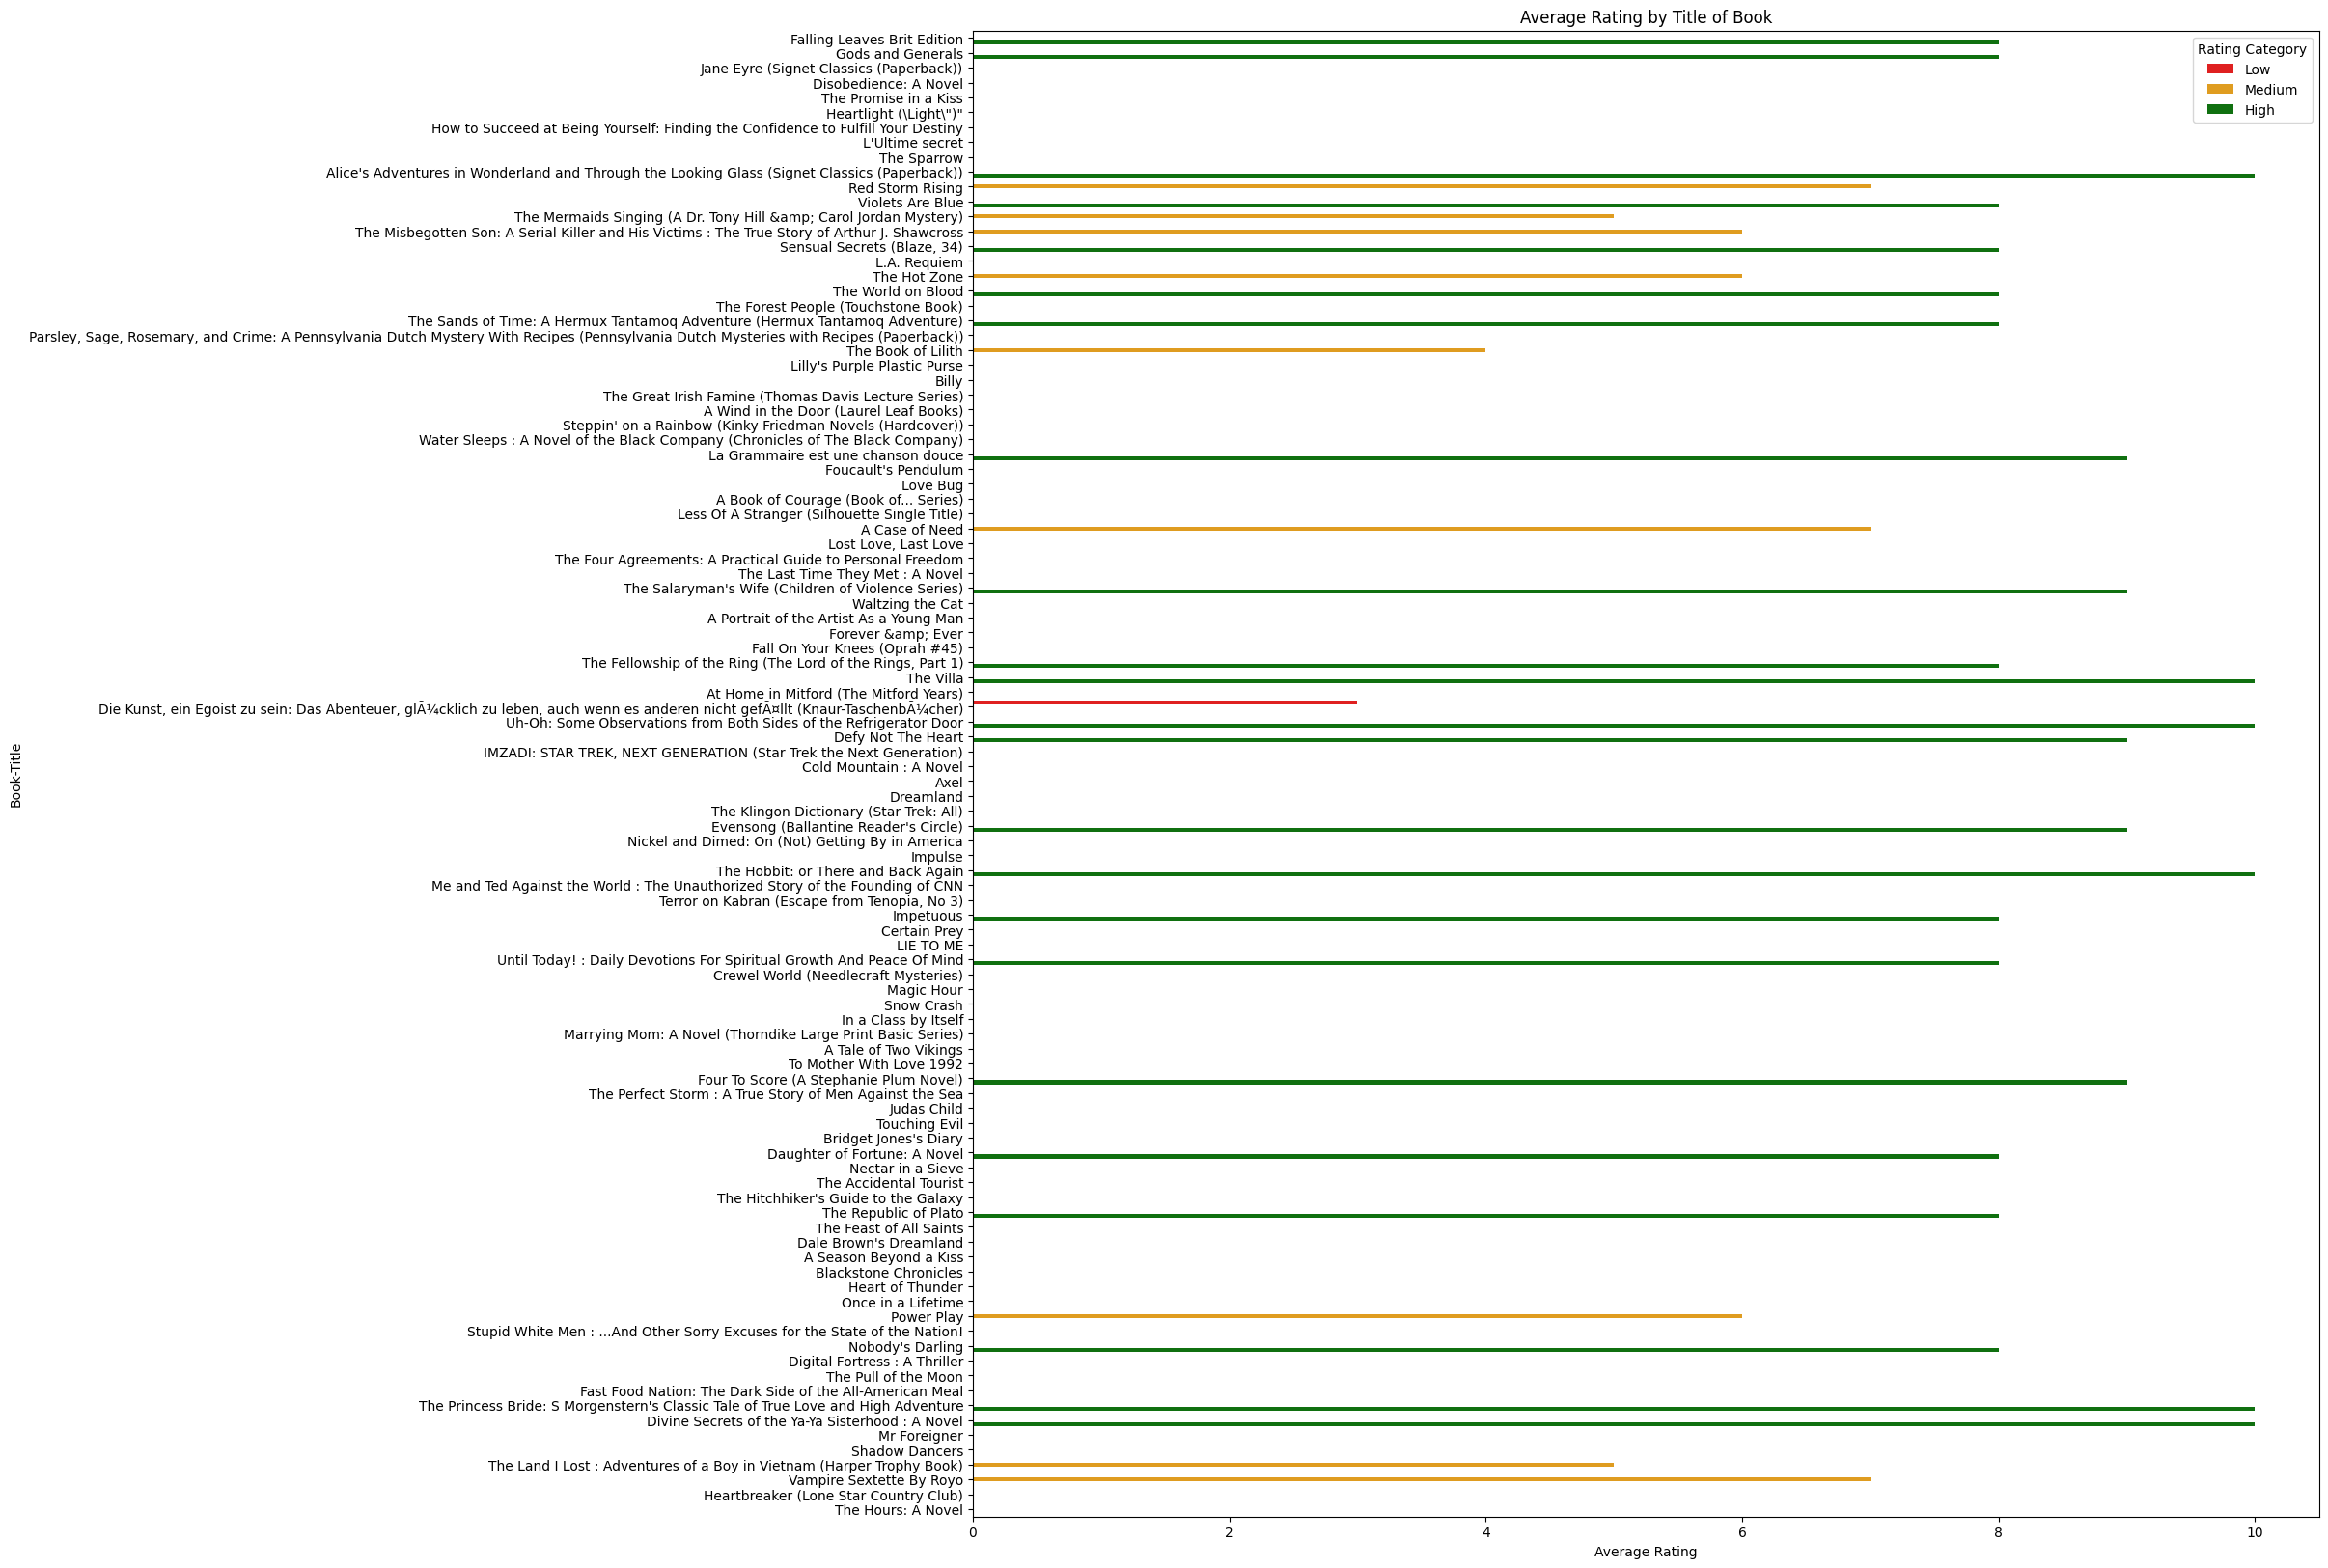

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sample_size = 100
df2 = final_df.sample(n=sample_size, random_state=42)

df2['Rating_Category'] = pd.cut(df2['Book-Rating'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

# Plotting bar plot dengan seaborn
plt.figure(figsize=(18, 20))
sns.barplot(data=df2, x='Book-Rating', y='Book-Title', hue='Rating_Category', palette={'Low': 'red', 'Medium': 'orange', 'High': 'green'})
plt.title('Average Rating by Title of Book')
plt.xlabel('Average Rating')
plt.ylabel('Book-Title')
plt.legend(title='Rating Category')
plt.show()

<Axes: xlabel='Book-Rating', ylabel='count'>

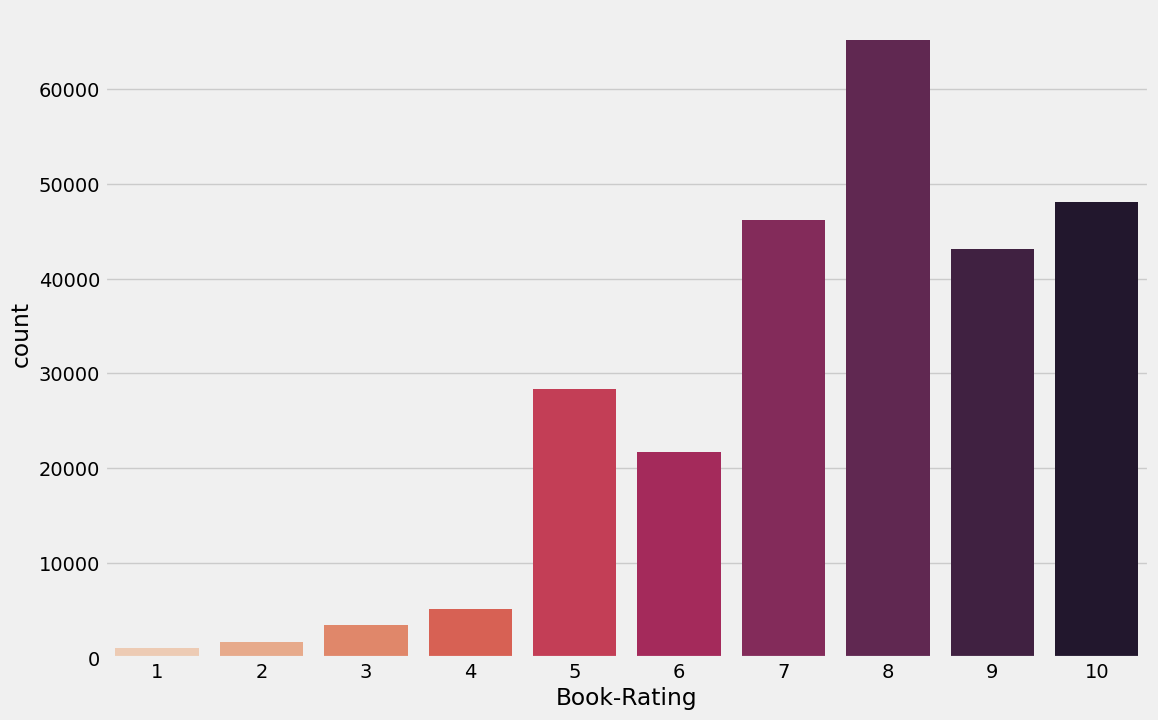

In [16]:
ratings = ratings_df[ratings_df.ISBN.isin(books_df.ISBN)]
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_implicit = ratings[ratings['Book-Rating'] == 0]

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit, x='Book-Rating', palette='rocket_r')

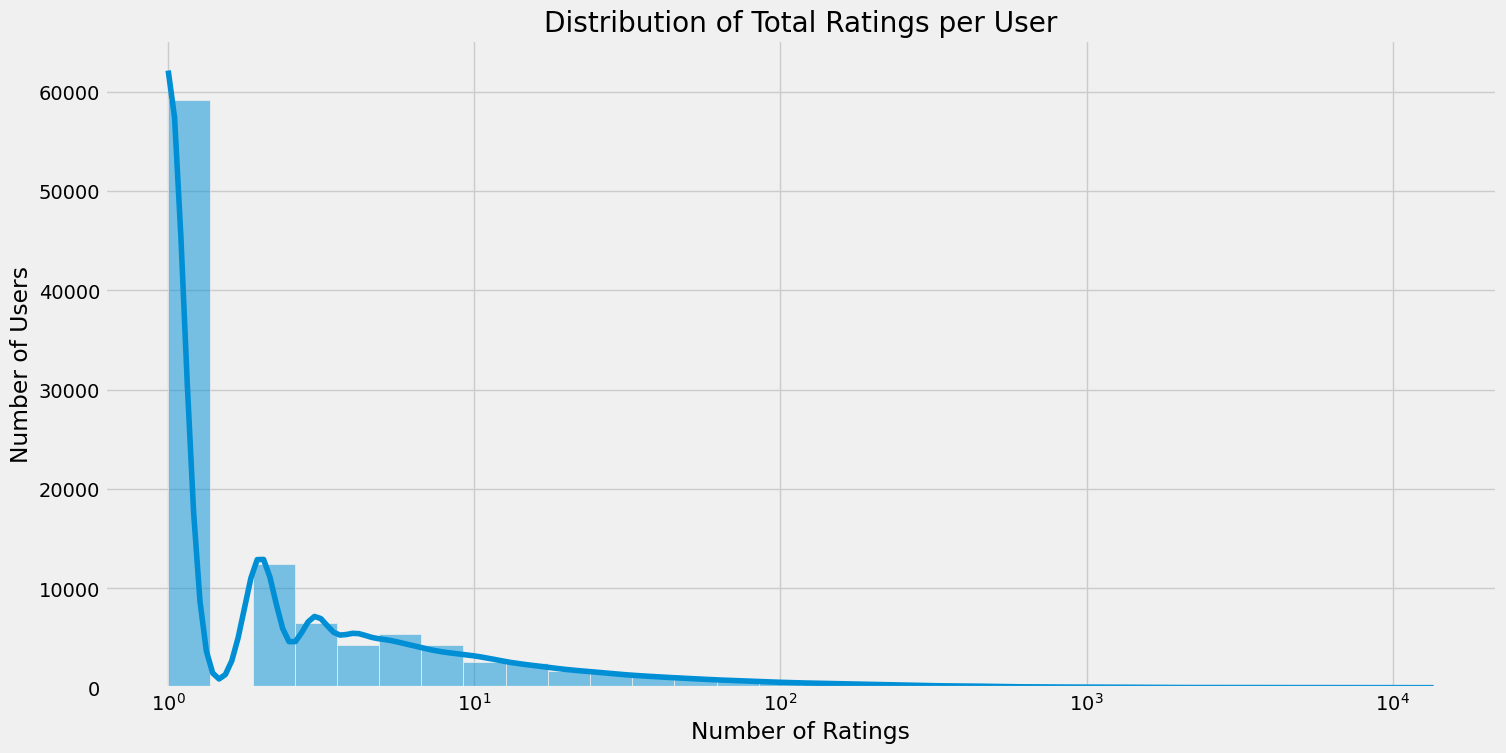

In [17]:
user_rating_counts = ratings_df.groupby('User-ID')['ISBN'].count()
plt.figure(figsize=(16, 8))
sns.histplot(user_rating_counts, kde=True, log_scale=(True, False), bins=30)
plt.title('Distribution of Total Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

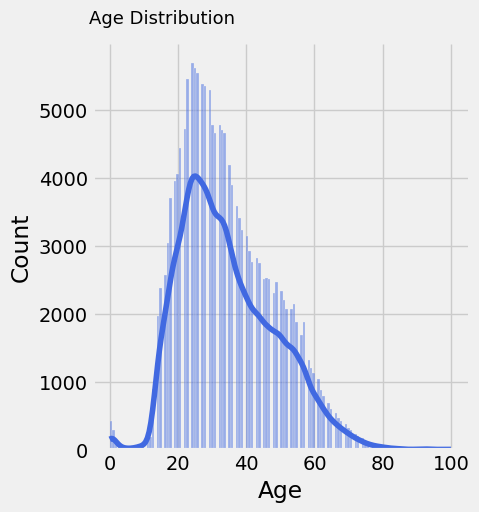

In [18]:
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#4169E1')
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='sans-serif', fontsize=13)

df_plot = users_df[users_df['Age']<=100]
plot_distribution('Age', df_plot)

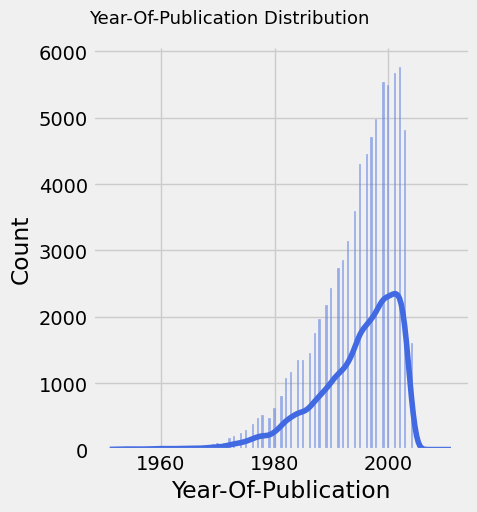

In [19]:
def plot_distribution(feature, data):
    sns.displot(x=feature, data=data, kde=True, color='#4169E1')
    plt.figtext(0.2, 1, '%s Distribution'%feature, fontfamily='sans-serif', fontsize=13)

books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'])
df_plot2 = books_df[(books_df['Year-Of-Publication']>1950) & (books_df['Year-Of-Publication']<=2016)]
plot_distribution('Year-Of-Publication', df_plot2)

In [20]:
#Top 20 Highest Rated Books
data = ratings_df.groupby('ISBN').agg(['mean', 'count'])['Book-Rating'].reset_index()


m = data['count'].quantile(0.99) # Keep only books that are rated more than this value
data = data[data['count']>m]
print('m =', m)
print(data.shape)
R = data['mean'] # average for the book rating
v = data['count'] # number of votes for the book = (votes)
C = data['mean'].mean() # mean vote across all books
data['weighted rating'] = (v/(v+m))*R + (m/(v+m))*C
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)


data = pd.merge(data, books_df, on='ISBN')[['Book-Title', 'Book-Author', 'mean', 'count', 'weighted rating', 
                              'Year-Of-Publication']].drop_duplicates('Book-Title').iloc[:20]
data

m = 36.0
(3306, 3)


,Book-Title,Book-Author,mean,count,weighted rating,Year-Of-Publication
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.541237,194,5.985293,2000
1,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.611765,170,5.978725,1999
2,Free,Paul Vincent,7.962963,54,5.973525,2003
3,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.467005,197,5.929688,1999
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.363095,168,5.767732,1998
5,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.571856,334,5.320587,2003
6,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.206349,63,5.036538,1999
7,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.041667,72,5.024234,1991
9,Falling Up,Shel Silverstein,6.921053,38,5.008342,1996
10,The Stand (The Complete and Uncut Edition),Stephen King,6.175439,57,4.942121,1990


In [21]:
# Drop duplicate books based on 'Book-Author' and 'Book-Title'
books_df = books_df.drop_duplicates(['Book-Author', 'Book-Title'])

# Merge books and ratings dataframes on 'ISBN'
data = pd.merge(books_df, ratings_df, on='ISBN')[['Book-Author', 'Book-Rating', 'Book-Title', 'ISBN']]

# Group by 'Book-Author' and aggregate mean and count of 'Book-Rating'
data = data.groupby('Book-Author').agg({'Book-Rating': ['mean', 'count']}).reset_index()
data.columns = ['Book-Author', 'mean', 'count']  # Flatten MultiIndex columns

# Determine the threshold for number of votes
m = data['count'].quantile(0.99)
data = data[data['count'] > m]

print('m =', m)
print(data.shape)

# Calculate weighted rating
R = data['mean']  # Average rating for the author
v = data['count']  # Number of votes for the author
C = data['mean'].mean()  # Mean vote across all authors
data['weighted rating'] = (v / (v + m)) * R + (m / (v + m)) * C

# Sort by weighted rating and reset index
data = data.sort_values('weighted rating', ascending=False).reset_index(drop=True)

# Display top 20 highest rated authors
print(data.head(20))

m = 287.34999999999854
(345, 3)
            Book-Author      mean  count  weighted rating
0         J. K. Rowling  5.423298   2086         5.125882
1      J. R. R. Tolkien  5.530499    541         4.641169
2        Bill Watterson  5.534351    524         4.625023
3             Dr. Seuss  5.327103    321         4.212234
4        J.R.R. TOLKIEN  4.505629    977         4.155900
5            Harper Lee  4.933661    407         4.119698
6          Alice Sebold  4.252822   1772         4.073379
7           Neil Gaiman  4.342513   1162         4.069764
8           C. S. Lewis  4.392065    857         4.034179
9         George Orwell  4.602128    470         3.981663
10          Gary Larson  4.470588    595         3.980861
11          Mitch Albom  4.506518    537         3.969810
12        J.D. Salinger  4.487713    529         3.952364
13            Dan Brown  4.046154   2015         3.911444
14        Michael Moore  4.296124    645         3.886429
15        Anita Diamant  4.172539    823

### Data process

In [22]:
missing_values = final_df.isnull().sum()
missing_values

ISBN                            0
Book-Title                      0
Book-Author                     0
Year-Of-Publication             0
Publisher                       0
Description                     0
Categories                      0
Language                        0
openlibrary_Description         0
openlibrary_Categories          0
openlibrary_Language          348
User-ID                         0
Book-Rating                     0
Location                        0
Age                        193323
dtype: int64

In [23]:
final_df['Book-Author'].fillna(final_df['Book-Author'].mode()[0], inplace=True)
final_df['Publisher'].fillna(final_df['Publisher'].mode()[0], inplace=True)

# Handle missing values in 'Age' column with median
final_df['Age'].fillna(final_df['Age'].median(), inplace=True)

In [24]:
missing_values = final_df.isnull().sum()
missing_values

ISBN                         0
Book-Title                   0
Book-Author                  0
Year-Of-Publication          0
Publisher                    0
Description                  0
Categories                   0
Language                     0
openlibrary_Description      0
openlibrary_Categories       0
openlibrary_Language       348
User-ID                      0
Book-Rating                  0
Location                     0
Age                          0
dtype: int64

In [25]:
# Converts the data types of the three fields in the final_df data box to integers
final_df['Age'] = final_df['Age'].astype(int)
final_df['Book-Rating'] = final_df['Book-Rating'].astype(int)
final_df['User-ID'] = final_df['User-ID'].astype(int)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703558 entries, 0 to 703557
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ISBN                     703558 non-null  object
 1   Book-Title               703558 non-null  object
 2   Book-Author              703558 non-null  object
 3   Year-Of-Publication      703558 non-null  int64 
 4   Publisher                703558 non-null  object
 5   Description              703558 non-null  object
 6   Categories               703558 non-null  object
 7   Language                 703558 non-null  object
 8   openlibrary_Description  703558 non-null  object
 9   openlibrary_Categories   703558 non-null  object
 10  openlibrary_Language     703210 non-null  object
 11  User-ID                  703558 non-null  int32 
 12  Book-Rating              703558 non-null  int32 
 13  Location                 703558 non-null  object
 14  Age                 

In [26]:
duplicate_count = final_df.duplicated().sum()
duplicate_count

0

In [27]:
# Remove the data whose rating is 0
zero_rating_books_df = final_df[final_df['Book-Rating'] == 0]
zero_rating_books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Description,Categories,Language,openlibrary_Description,openlibrary_Categories,openlibrary_Language,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,Provides an introduction to classical myths pl...,Social Science,en,An excellent primer on classical mythology for...,"Classical Mythology, Mythology, Classical, Myt...",English,2,0,"stockton, california, usa",18
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,11400,0,"ottawa, ontario, canada",49
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,41385,0,"sudbury, ontario, canada",35
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,85526,0,"victoria, british columbia, canada",36
7,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluct...",Actresses,en,"E-book extras: ""Hero of the Humdrum"": A profil...","Actresses, Fiction, Literature, Sisters, Women...",English,96054,0,"ottawa, ontario, canada",29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703547,0130614661,Network Security: Private Communication in a P...,Charlie Kaufman,1995,Prentice Hall,Book on network security methods,Computers,en,"This witty, concisely-written guide to the lat...","Security measures, Electronic data processing ...",English,195079,0,"omaha, nebraska, usa",43
703552,0810941511,Handmade Baby Gifts,Teresa Layman,1999,Harry N Abrams Inc,Presents projects with instructions and patter...,Infants' supplies,en,Not found,Infants' supplies,English,41842,0,"st. charles, missouri, usa",35
703555,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,185384,0,"st. charles, missouri, usa",35
703556,0553213490,Life on the Mississippi (Bantam Classics),Mark Twain,1997,Bantam Books,Fashioned from the same experiences that would...,Literary Collections,en,"At once a romantic history of a mighty river, ...","American Authors, Fiction, Historical Fiction,...",English,203240,0,"st. louis, missouri, usa",32


In [28]:
final_df = final_df[final_df['Book-Rating'] != 0]

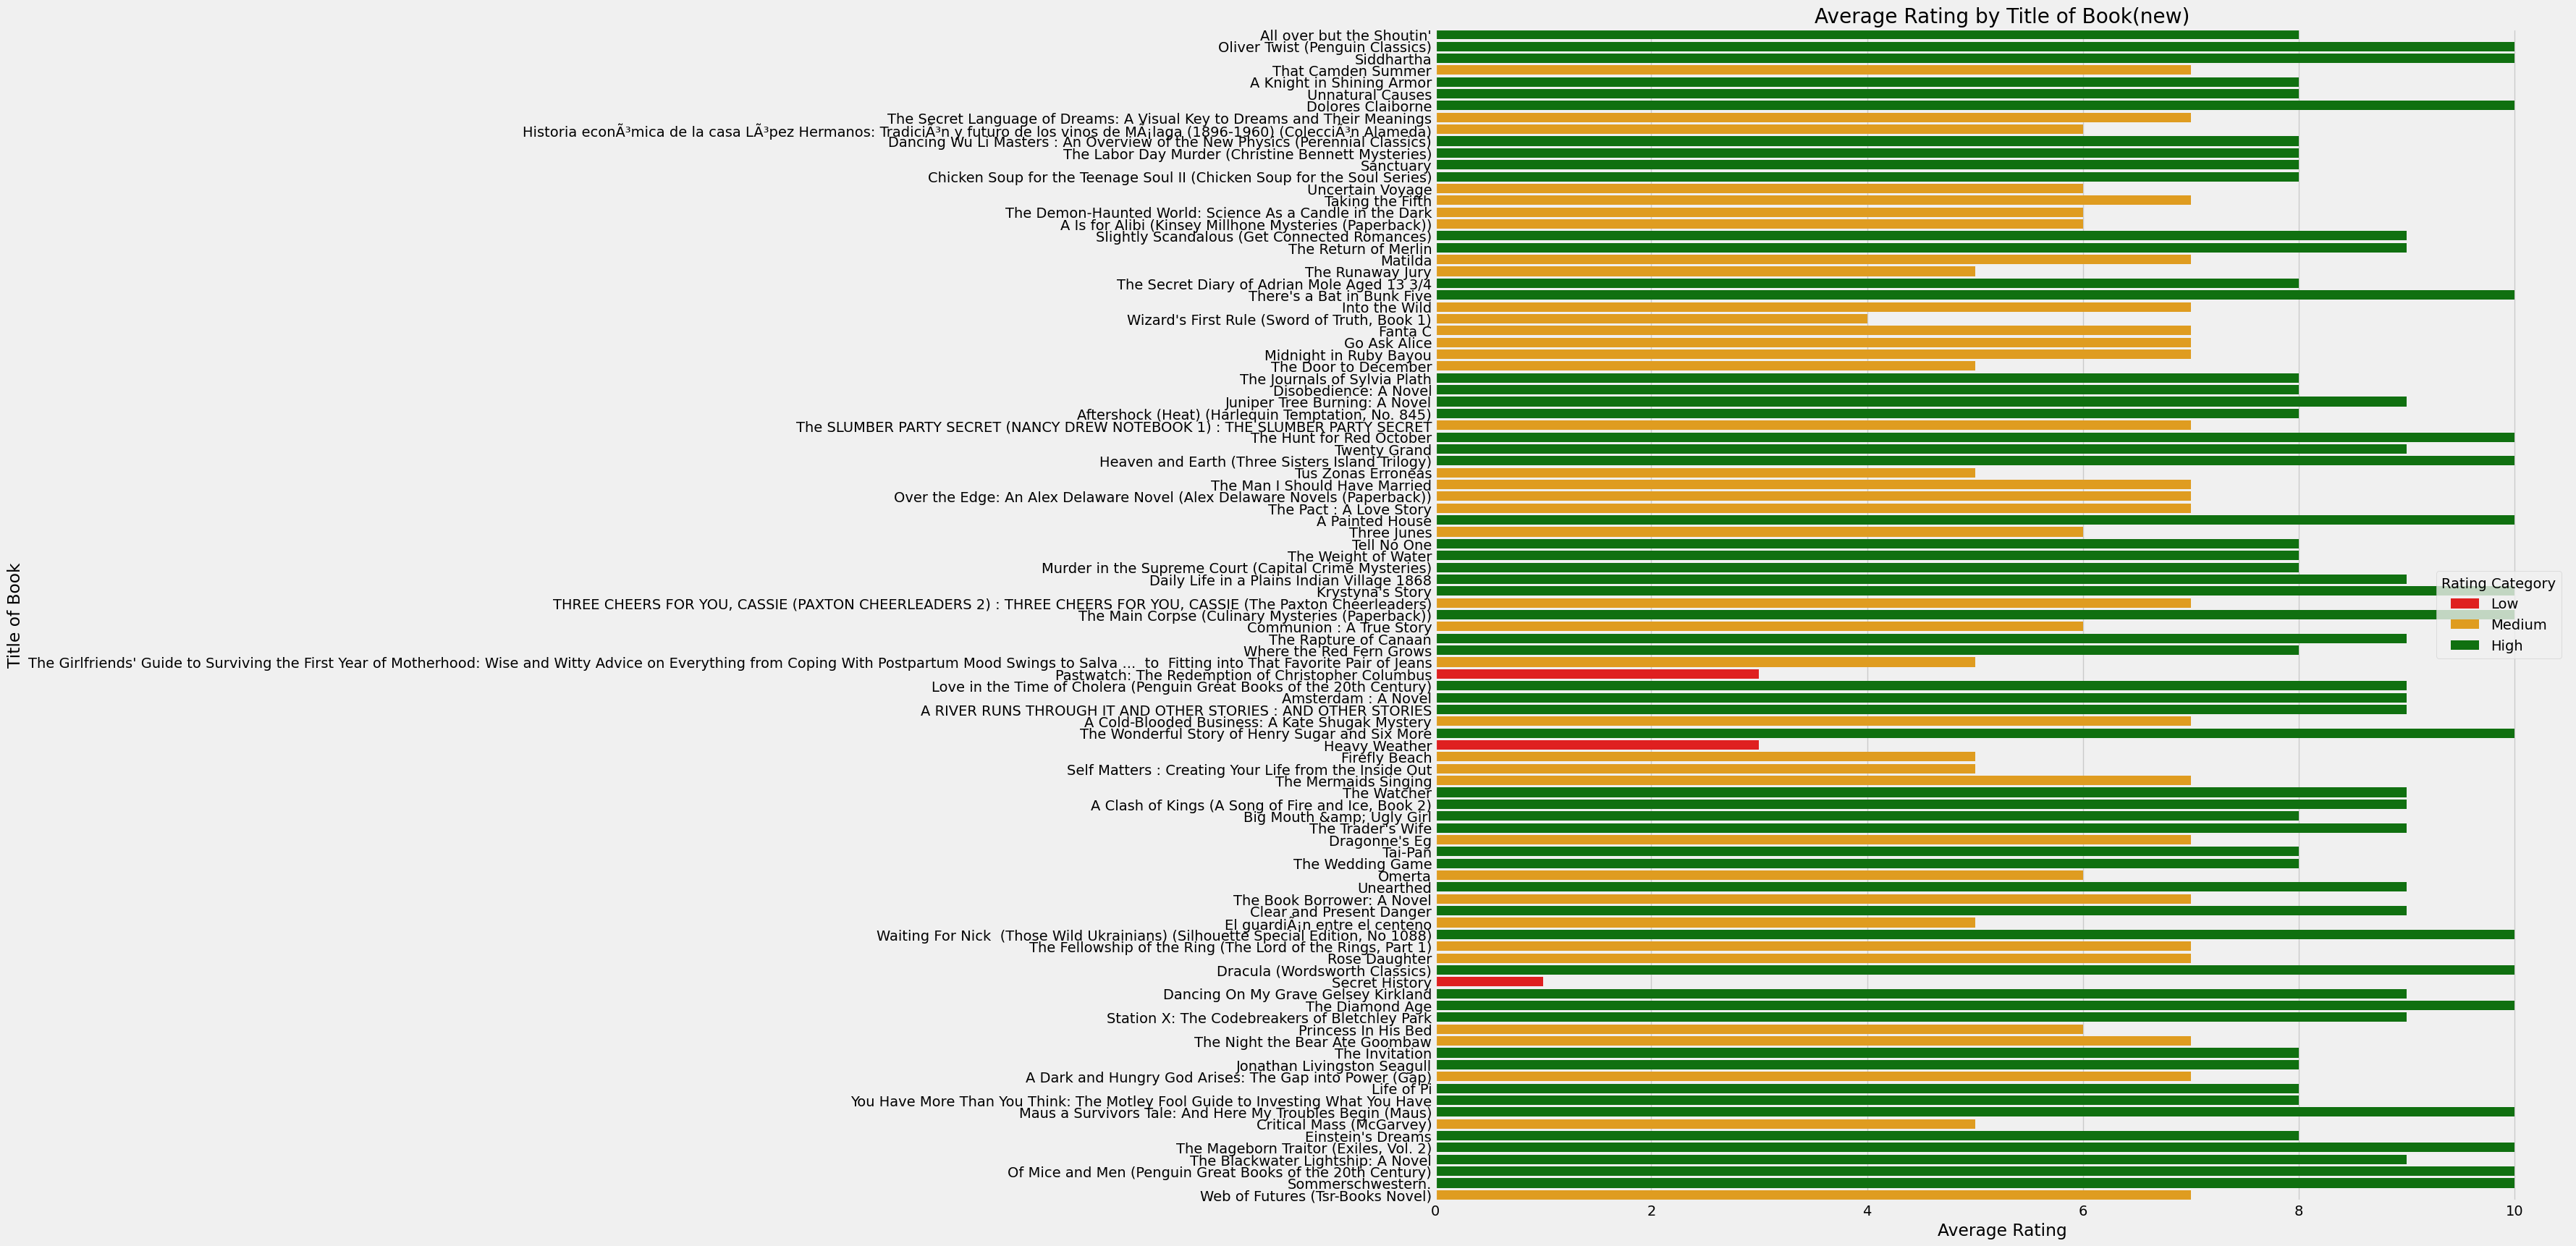

In [29]:
sample_size = 100
df3 = final_df.sample(n=sample_size, random_state=42)


df3['Rating_Category'] = pd.cut(df3['Book-Rating'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

# Plotting bar plot dengan seaborn
plt.figure(figsize=(18, 20))
sns.barplot(data=df3, x='Book-Rating', y='Book-Title', hue='Rating_Category', palette={'Low': 'red', 'Medium': 'orange', 'High': 'green'})
plt.title('Average Rating by Title of Book(new)')
plt.xlabel('Average Rating')
plt.ylabel('Title of Book')
plt.legend(title='Rating Category')
plt.show()

In [30]:
final_df.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,263865.00000,263865.000000,263865.000000,263865.000000
mean,1970.15099,130141.614970,7.660110,36.089713
std,226.50293,84266.370984,1.812999,11.550054
min,0.00000,8.000000,1.000000,0.000000
25%,1993.00000,51440.000000,7.000000,31.000000
50%,1998.00000,126006.000000,8.000000,35.000000
75%,2001.00000,205280.000000,9.000000,39.000000
max,2050.00000,279858.000000,10.000000,244.000000


First identify and mark outliers (greater than 2022 or equal to 0) in the 'Year-Of-Publication' field as missing values. 
The average of the 'Year-Of-Publication' field in books_df is then used to populate the missing value of that field in final_df. 
Finally, the populated value is converted to an integer.

In [31]:
import numpy as np
final_df.loc[(final_df["Year-Of-Publication"] > 2022) | (final_df["Year-Of-Publication"] == 0), 'Year-Of-Publication'] = np.nan
final_df.loc[:, "Year-Of-Publication"] = final_df["Year-Of-Publication"].fillna(round(books_df["Year-Of-Publication"].mean())).astype(np.int32)

Then identify and mark outliers in the 'Age' field (greater than 90 years old or less than 5 years old) as missing values. 
The average value of the 'Age' field in users_df is then used to populate the missing value of that field in final_df. 
Finally, the data types of the 'Age' and 'Year-Of-Publication' fields are converted to 32-bit integers

In [32]:
final_df.loc[(final_df.Age > 90) | (final_df.Age < 5), 'Age'] = np.nan

#replacing NaNs with mean
final_df.Age = final_df.Age.fillna(users_df.Age.mean())

#setting the data type as int
final_df.Age = final_df.Age.astype(np.int32)
final_df['Year-Of-Publication'] = final_df['Year-Of-Publication'].astype(np.int32)

In [33]:
final_df.describe()

,Year-Of-Publication,User-ID,Book-Rating,Age
count,263865.000000,263865.000000,263865.000000,263865.000000
mean,1995.717738,130141.614970,7.660110,35.919364
std,7.881883,84266.370984,1.812999,10.100039
min,1904.000000,8.000000,1.000000,5.000000
25%,1993.000000,51440.000000,7.000000,31.000000
50%,1998.000000,126006.000000,8.000000,35.000000
75%,2001.000000,205280.000000,9.000000,39.000000
max,2020.000000,279858.000000,10.000000,90.000000


Data preparation: 

First, the 'Book-Title', 'Book-Author', 'Description', and 'Categories' columns in books_df are concatenated into a text corpus. 
Using Gensim's Word2Vec model, a word vector model word2vec_model_recommender is obtained after training in corpus. 

In [34]:
corpus = (books_df['Book-Title'].astype(str) + ' ' + 
          books_df['Book-Author'].astype(str) + ' ' +
          books_df['Description'].astype(str) + ' ' +
          books_df['Categories'].astype(str)).apply(str.split).tolist()

**Recommended algorithm Word2Vec:**
- The recommend function is the core of the recommendation algorithm. 
- The input parameters are the user ID user_id, the complete book data, and the trained Word2Vec model word2vec_model. 
- First get the user's favorite book information, including title, author, category, and description. 
- This information is spliced into a text and divided into words to obtain an average word vector avg_vector. 
- Then the average word vector of each book is calculated, and the cosine similarity is calculated with the average word vector of the  user, and the similarity score is obtained. 
- According to the similarity score, the top 10 books with the highest similarity and scores higher than 5 are selected as the recommended results. 
- Finally, the recommendation result is returned in DataFrame format. 

In [35]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
word2vec_model_recommender = Word2Vec(sentences=corpus, vector_size=500, window=5, min_count=5, sg=2)

def recommend(user_id, data, word2vec_model):
    # Get user preferences
    user_preferences = data[data['User-ID'] == user_id]
    if user_preferences.empty:
        return None

    # Get information about your favorite books
    liked_books = user_preferences['Book-Title'].tolist()
    liked_ISBN = user_preferences['ISBN'].tolist()
    liked_authors = user_preferences['Book-Author'].tolist()
    liked_genres = user_preferences['Categories'].tolist()
    liked_description = user_preferences['Description'].tolist()

    # Merge user preference information
    text = ' '.join(liked_ISBN + liked_books + liked_authors + liked_genres + liked_description)
    
    # Divide the text into words
    tokens = text.split()
    
    # Get text vector
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if len(vectors) == 0:
        return None
    avg_vector = sum(vectors) / len(vectors)

    # Calculate the similarity to each book
    similarities = []
    recommended_titles = set()
    for idx, row in data.iterrows():
        row_text = ' '.join([str(row[col]) for col in data.columns])
        row_tokens = row_text.split()
        row_vectors = [word2vec_model.wv[token] for token in row_tokens if token in word2vec_model.wv]
        if len(row_vectors) > 0:
            row_avg_vector = sum(row_vectors) / len(row_vectors)
            similarity = cosine_similarity([avg_vector], [row_avg_vector])[0][0]
            similarities.append((row, similarity))

    # Rank the similarity and select the top 10 recommendations
    similarities.sort(key=lambda x: x[1], reverse=True)
    recommendations = []
    for book, sim in similarities:
        if book['Book-Title'] not in recommended_titles and book['Book-Rating'] > 5:
            recommendations.append(book.to_dict())
            recommended_titles.add(book['Book-Title'])
        if len(recommendations) >= 10:
            break

    # Convert the recommendation result to a DataFrame
    recommendations_df = pd.DataFrame(recommendations)

    return recommendations_df

user_id = 279858
recommendations = recommend(user_id, final_df, word2vec_model_recommender)
print(recommendations)

KeyboardInterrupt: 

**Data Preprocessing**

Splicing the 'Book Title', 'Book Author', 'Description' and 'Categories' columns in' final_df 'into a large text corpus. 
Use 'TfidfVectorizer' to extract TF-IDF features from 'corpus' and generate tfidf_matrix.

**Recommendation Algorithm**:
- The 'recommend' function accepts the user ID and the entire dataset 'final_df' as input. 
- First, get the user's favorite book list 'user_preferences'. 
- Then, generate the user preference vector user_vector according to user_preferences. 
- Next, traverse the entire data set, calculating the cosine similarity between each book and the user's preference vector, and store the results in the similarities list. 
- Sorts the similarities list in descending order of similarity. 
- From the similarities list after sorting, select books that the first 10 users are not familiar with, score more than 5 points, and do not repeat as the recommendation results. 
- Finally, the recommendation result is returned in DataFrame format. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

corpus = (books_df['Book-Title'].astype(str) + ' ' + 
          books_df['Book-Author'].astype(str) + ' ' +
          books_df['Description'].astype(str) + ' ' +
          books_df['Categories'].astype(str)).tolist()

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

def recommend(user_id, data):
    # Get user preferences
    user_preferences = final_df.loc[final_df['User-ID'] == user_id, 'Book-Title'].tolist()
    
    # Create a user preference vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_preferences)])
    
    # Calculate how similar each book is to user preferences
    similarities = []
    for idx, row in data.iterrows():
        row_text = ' '.join([str(row[col]) for col in data.columns])
        row_vector = tfidf_vectorizer.transform([row_text])
        similarity = cosine_similarity(user_vector, row_vector)[0][0]
        similarities.append((row, similarity))
    
    # Sort in descending order of similarity
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Get the top 10 recommendations
    recommendations = []
    recommended_titles = set()
    for book, sim in similarities:
        if book['Book-Title'] not in user_preferences and book['Book-Rating'] > 5 and book['Book-Title'] not in recommended_titles:
            recommendations.append(book.to_dict())
            recommended_titles.add(book['Book-Title'])
        if len(recommendations) >= 10:
            break
    
    # Convert to a DataFrame
    recommendations_df = pd.DataFrame(recommendations)

    return recommendations_df

user_id = 279858
recommendations = recommend(user_id, final_df)
recommendations

In [ ]:
# Test run
# collaborative filtering
# from scipy.sparse import csr_matrix
# from implicit.als import AlternatingLeastSquares
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# books = pd.read_csv('Books.csv')
# users = pd.read_csv('Users.csv')
# ratings = pd.read_csv('Ratings.csv')





# new_user_data = {'User-ID': 279858, 'Location': "Kensington, NSW, Australia", 'Age': 38}

# # Append the new user to the DataFrame
# users = pd.concat([users, pd.DataFrame([new_user_data])], ignore_index=True)

# # List of ISBNs to be rated by the new user
# isbn_list = [
#     '0425176428', '0385418493', '0871137380', '0486265862', '0060973129',
#     '0029087104', '0553256696', '0393038440', '0345308239', '0131337033', 
# ]

# # Generate random high ratings (6-10)
# ratings_list = np.random.randint(6, 11, size=len(isbn_list))

# # Create new user ratings
# new_user_ratings = [{'User-ID': 279858, 'ISBN': isbn, 'Book-Rating': rating} for isbn, rating in zip(isbn_list, ratings_list)]

# ratings = pd.concat([ratings, pd.DataFrame(new_user_ratings)], ignore_index=True)


# # Map user and book IDs to continuous indices
# user_id_mapping = {id: idx for idx, id in enumerate(ratings['User-ID'].unique())}
# book_id_mapping = {id: idx for idx, id in enumerate(ratings['ISBN'].unique())}

# ratings['User-ID'] = ratings['User-ID'].map(user_id_mapping)
# ratings['ISBN'] = ratings['ISBN'].map(book_id_mapping)
# ratings.dropna(subset=['Book-Rating'], inplace=True)
# all_user_ids = ratings['User-ID'].unique()
# all_book_ids = ratings['ISBN'].unique()

# train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

# train_user_ids = set(train_data['User-ID'])
# train_book_ids = set(train_data['ISBN'])
# missing_users = set(all_user_ids) - train_user_ids
# missing_books = set(all_book_ids) - train_book_ids

# missing_data = ratings[ratings['User-ID'].isin(missing_users) | ratings['ISBN'].isin(missing_books)]
# train_data = pd.concat([train_data, missing_data]).drop_duplicates()

# # Create sparse matrices for training and test data
# n_users = ratings['User-ID'].nunique()
# n_items = ratings['ISBN'].nunique()
# train_matrix = csr_matrix((train_data['Book-Rating'], (train_data['User-ID'], train_data['ISBN'])), shape=(n_users, n_items))
# test_matrix = csr_matrix((test_data['Book-Rating'], (test_data['User-ID'], test_data['ISBN'])), shape=(n_users, n_items))
# print("-------matrix finished---------")

# # Check for NaN values in the training matrix
# if np.any(np.isnan(train_matrix.data)):
#     print("NaN values found in training matrix")
# else:
#     print("No NaN values in training matrix")


# # Initialize and train the ALS model
# als_model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=20, use_gpu=False, calculate_training_loss=True)
# als_model.fit(train_matrix.T, show_progress=True)


# # Evaluate the model
# def evaluate_model(test_matrix, als_model):
#     test_user_items = test_matrix.nonzero()
#     predictions = []
#     ground_truth = []
#     for user, item in zip(test_user_items[0], test_user_items[1]):
#         if user < als_model.user_factors.shape[0] and item < als_model.item_factors.shape[0]:
#             prediction = als_model.user_factors[user, :].dot(als_model.item_factors[item, :].T)
#             predictions.append(prediction)
#             ground_truth.append(test_matrix[user, item])
#     if len(predictions) == 0:
#         return float('inf')  
#     return np.sqrt(mean_squared_error(ground_truth, predictions))

# def recommend_books_als(user_id, num_recommendations=10):
#     if user_id not in user_id_mapping:
#         return "user not found" 
#     user_index = user_id_mapping[user_id]
#     user_ratings = train_matrix[user_index]
#     #ids, scores = als_model.recommend(user_index, user_ratings, N=num_recommendations, filter_already_liked_items=True)
#     recommended_books = als_model.recommend(user_index, user_ratings, N=num_recommendations, filter_already_liked_items=True)
#     # recommended_book_ids = [list(book_id_mapping.keys())[list(book_id_mapping.values()).index(i)] for i, _ in recommended_books]
#     # return books[books['ISBN'].isin(recommended_book_ids)]

#     # Convert recommended book indices back to ISBNs
#     recommended_book_isbns = [list(book_id_mapping.keys())[list(book_id_mapping.values()).index(i)] for i in recommended_books[0]]
    
#     # Retrieve book information from books DataFrame
#     recommended_books_info = books[books['ISBN'].isin(recommended_book_isbns)]

#     top_5_recommended_books = recommended_books_info.head(5)
    
#     return top_5_recommended_books

# recommended_books_df = recommend_books_als(279858)

# content-filtering model

In [ ]:
#recommended_books_df
#recommendations
concatenated_df = pd.concat([recommended_books_df, recommendations], ignore_index=True)

concatenated_df

In [ ]:
concatenated_df.to_csv('concatenated_recommendations.csv', index=False)


TP = 7
FP = 8
TN = impossible
FN = impossible
Precision = TP/(TP+FP) = 7/15 = 0.47
Recall = TP/(TP+FN)
F1 = 2*precision*recall/(precision+recall)
Accuracy=(TP+TN)/(whole dataset)